In [3]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://docs.google.com/spreadsheets/d/1rFyU55Pu7nm9BZItX_qy-XF-gSfeSRgzejEchmZHnV4/export?format=csv"
df = pd.read_csv(url)

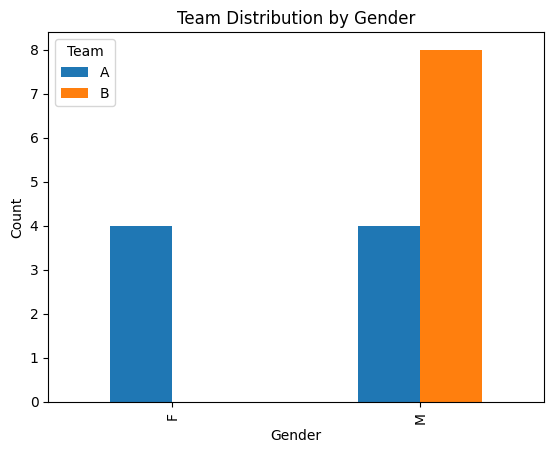

In [4]:
pd.crosstab(df["Gender"], df["Team"]).plot(kind="bar")
plt.title("Team Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

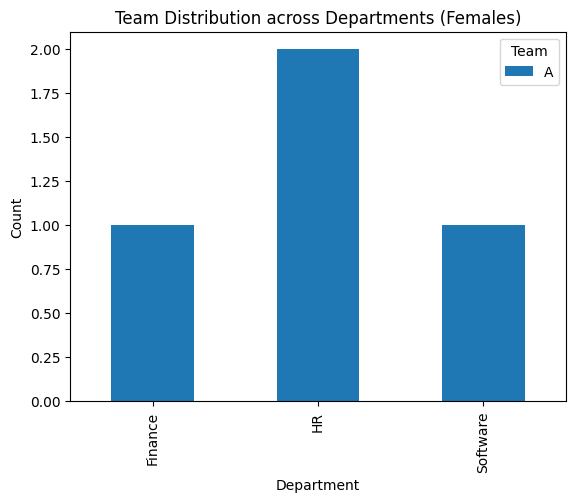

In [5]:
female_df = df[df["Gender"] == "F"]

pd.crosstab(female_df["Department"], female_df["Team"]).plot(kind="bar")
plt.title("Team Distribution across Departments (Females)")
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()

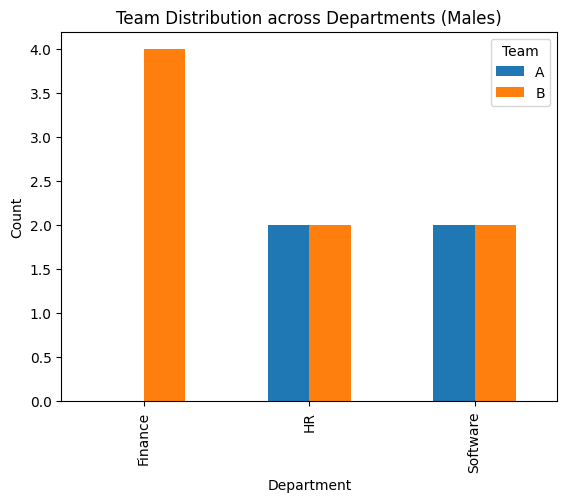

In [6]:
male_df = df[df["Gender"] == "M"]

pd.crosstab(male_df["Department"], male_df["Team"]).plot(kind="bar")
plt.title("Team Distribution across Departments (Males)")
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()

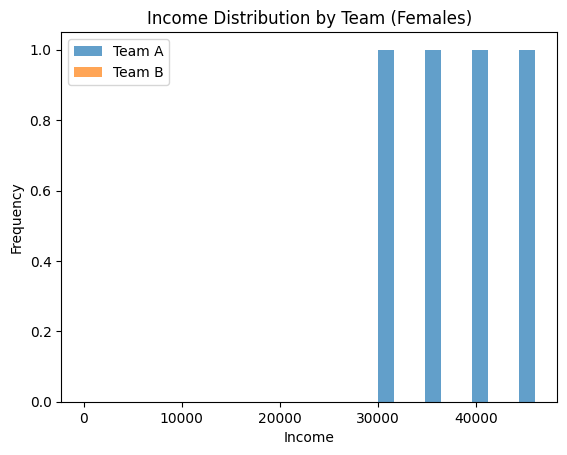

In [7]:
female_df = df[df["Gender"] == "F"]

plt.hist(female_df[female_df["Team"] == "A"]["Income"],
         bins=10, alpha=0.7, label="Team A")

plt.hist(female_df[female_df["Team"] == "B"]["Income"],
         bins=10, alpha=0.7, label="Team B")

plt.title("Income Distribution by Team (Females)")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.legend()
plt.show()

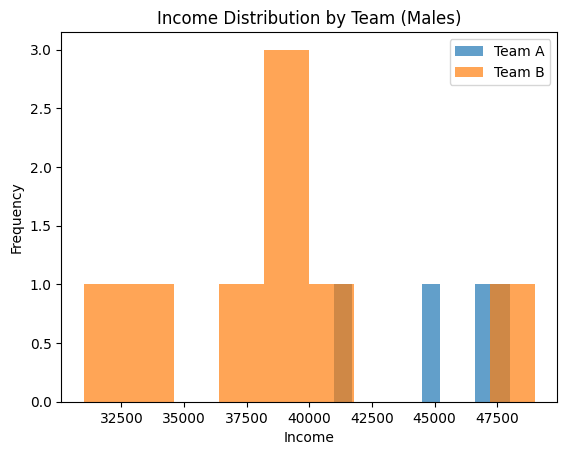

In [8]:
male_df = df[df["Gender"] == "M"]

plt.hist(male_df[male_df["Team"] == "A"]["Income"],
         bins=10, alpha=0.7, label="Team A")

plt.hist(male_df[male_df["Team"] == "B"]["Income"],
         bins=10, alpha=0.7, label="Team B")

plt.title("Income Distribution by Team (Males)")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.legend()
plt.show()

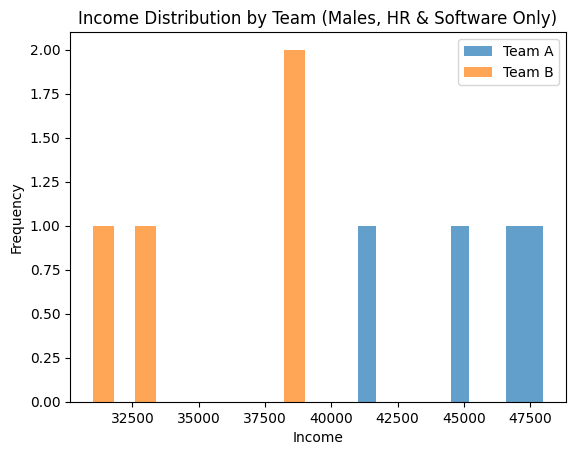

In [9]:
male_non_finance_df = df[(df["Gender"] == "M") &
                         (df["Department"] != "Finance")]

plt.hist(male_non_finance_df[male_non_finance_df["Team"] == "A"]["Income"],
         bins=10, alpha=0.7, label="Team A")

plt.hist(male_non_finance_df[male_non_finance_df["Team"] == "B"]["Income"],
         bins=10, alpha=0.7, label="Team B")

plt.title("Income Distribution by Team (Males, HR & Software Only)")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [10]:
def decision_tree_classifier(row):
    income = row["Income"]
    gender = row["Gender"]
    department = row["Department"]

    if gender == "F":
        return "A"
    else:
        if department == "Finance":
            return "B"
        else:
            if income >= 40000:
                return "A"
            else:
                return "B"

In [11]:
df["Predicted_Team"] = df.apply(decision_tree_classifier, axis=1)
print(df[["Department", "Income", "Gender", "Team", "Predicted_Team"]])
accuracy = (df["Team"] == df["Predicted_Team"]).mean()
print(f'Accuracy of the model is: {accuracy}')

   Department  Income Gender Team Predicted_Team
0     Finance   46000      F    A              A
1     Finance   39000      M    B              B
2    Software   41000      M    A              A
3    Software   33000      M    B              B
4          HR   30000      F    A              A
5     Finance   49000      M    B              B
6     Finance   41000      M    B              B
7    Software   48000      M    A              A
8    Software   39000      M    B              B
9          HR   39000      M    B              B
10         HR   45000      M    A              A
11         HR   47000      M    A              A
12    Finance   37000      M    B              B
13         HR   31000      M    B              B
14   Software   40000      F    A              A
15         HR   35000      F    A              A
Accuracy of the model is: 1.0


In [13]:

income = float(input("Enter Income: "))
gender = input("Enter Gender (M/F): ").strip().upper()
department = input("Enter Department (HR / Finance / Software): ").strip()


input_df = pd.DataFrame({
    "Income": [income],
    "Gender": [gender],
    "Department": [department]
})


predicted_team = decision_tree_classifier(input_df.iloc[0])

print("Predicted Team:", predicted_team)

Enter Income: 45000
Enter Gender (M/F): M
Enter Department (HR / Finance / Software): HR
Predicted Team: A
